# Seaborn Introduction

According to the [documentation](https://seaborn.pydata.org/):
    
```
"Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics."
```

For this turial we will use the [`Breast Cancer Wisconsin (Diagnostic) Data Set`](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns # It's very common to abbreviate seaborn as sns.

from scipy.stats import zscore # This library is useful for data normalization

from sklearn.decomposition import PCA # We will use the PCA and the T-SNE algorithms for dimensionality reduction
from sklearn.manifold import TSNE

sns.set(style='whitegrid', palette='muted')

1. [Loading The Data](#Loading-The-Data)
2. [Density plots](#Density-Plots)
    1. [violinplot](#violinplot)
    2. [boxplot](#boxplot)
    3. [swarmplot](#swarmplot)
3. [Joint Plot And Correlation Heatmap](#Joint-Plot-And-Correlation-Heatmap)
    1. [Joint plot](#Joint-plot)
    2. [correlation heatmap](#correlation-heatmap)
4. [Dimensionality Reduction](#Dimensionality-Reduction)
    1. [PCA](#PCA)
    2. [T-SNE](#T-SNE)

# Loading The Data

In [2]:
DATASET_PATH = 'data.csv'

First, lets load the dataset from a CSV file and take look at top 5 rows.

In [70]:
df = pd.read_csv(DATASET_PATH)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


As you can see we can drop columns `id`, and `Unnamed: 32` without losing any useful information about the data.

In [71]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Let's define some useful functions for later use.

In [77]:
X = df.drop(columns=['diagnosis'])
X = zscore(X)

Y = df['diagnosis']

def get_data(start, end):
    data = pd.concat([X.iloc[:, start:end], Y], axis=1)
    data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='values')
    
    return data

# Density Plots

The very first family of plots gives us useful information about the density of the data.

## violinplot

This plot shows the density of datapoints within individual classes.

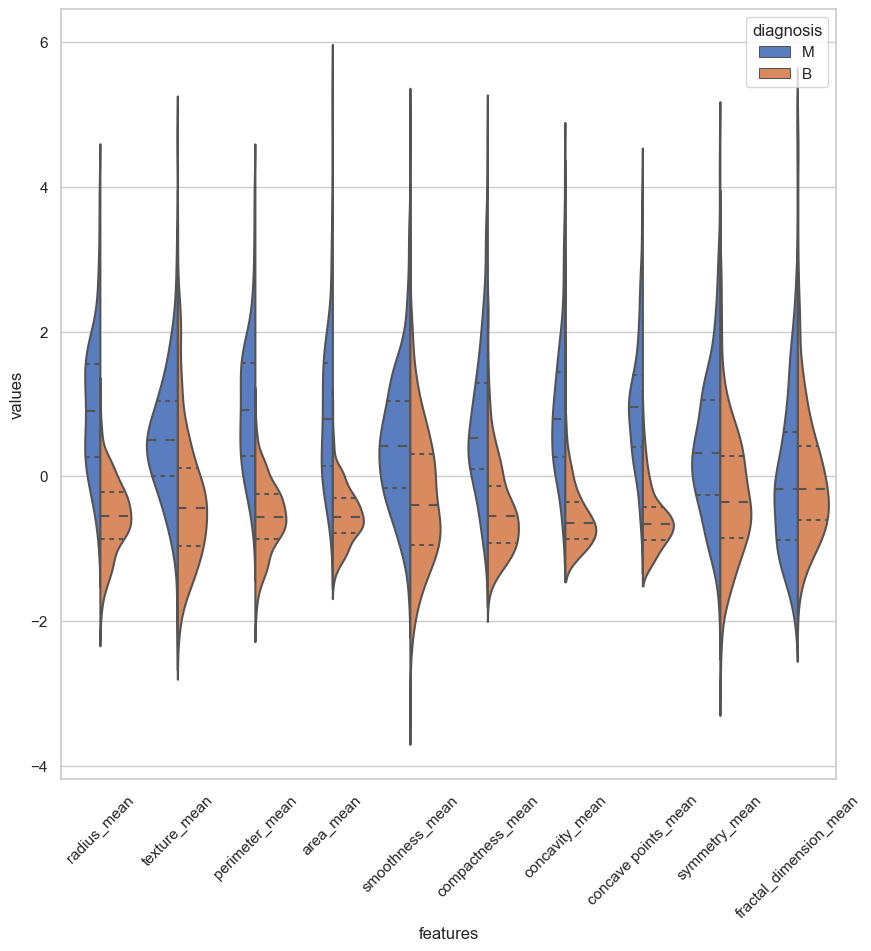

In [81]:
plt.figure(figsize=(10, 10))
sns.violinplot(x='features', y='values', hue='diagnosis', data=get_data(0, 10), split=True, inner='quart')
plt.xticks(rotation=45)

plt.show()

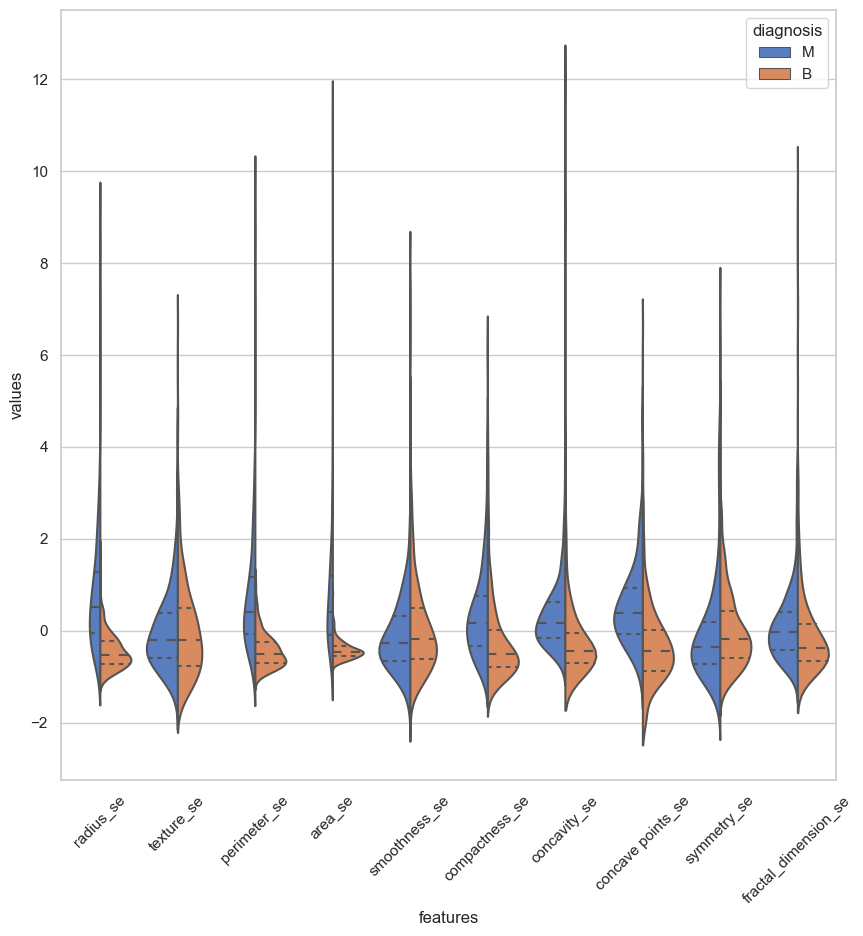

In [82]:
plt.figure(figsize=(10, 10))
sns.violinplot(x='features', y='values', hue='diagnosis', data=get_data(10, 20), split=True, inner='quart')
plt.xticks(rotation=45)

plt.show()

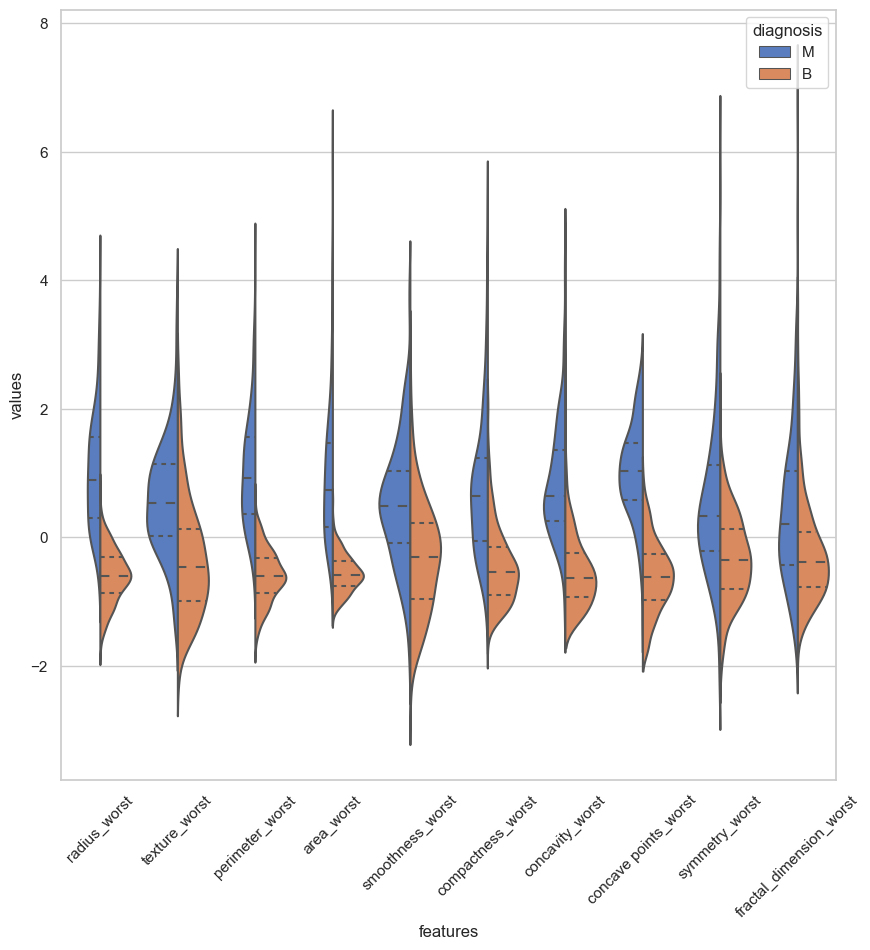

In [83]:
plt.figure(figsize=(10, 10))
sns.violinplot(x='features', y='values', hue='diagnosis', data=get_data(20, 30), split=True, inner='quart')
plt.xticks(rotation=45)

plt.show()

## boxplot

The next useful plot is the `boxplot`

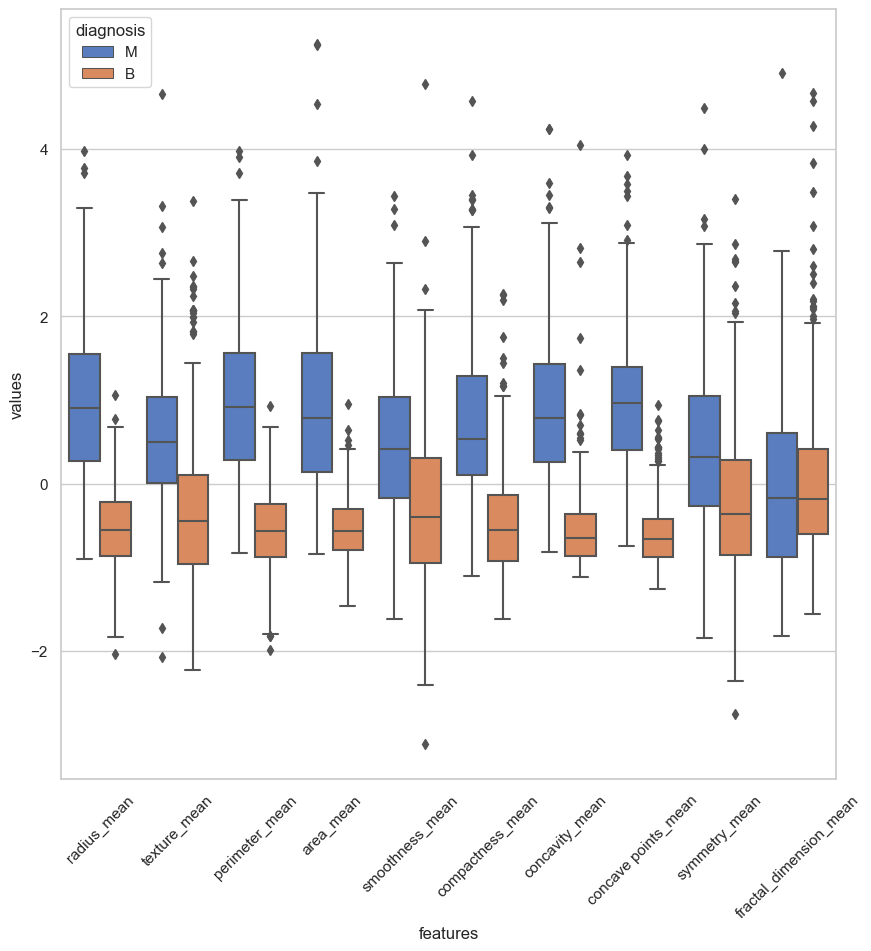

In [89]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='features', y='values', hue='diagnosis', data=get_data(0, 10))
plt.xticks(rotation=45)

plt.show()

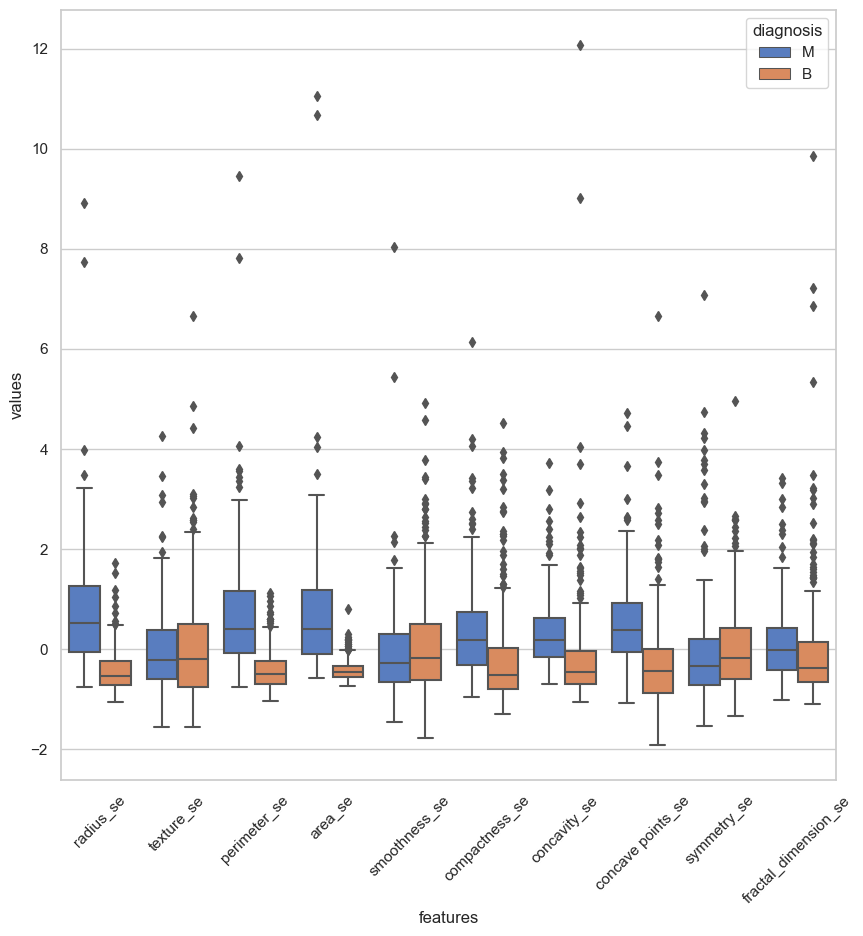

In [90]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='features', y='values', hue='diagnosis', data=get_data(10, 20))
plt.xticks(rotation=45)

plt.show()

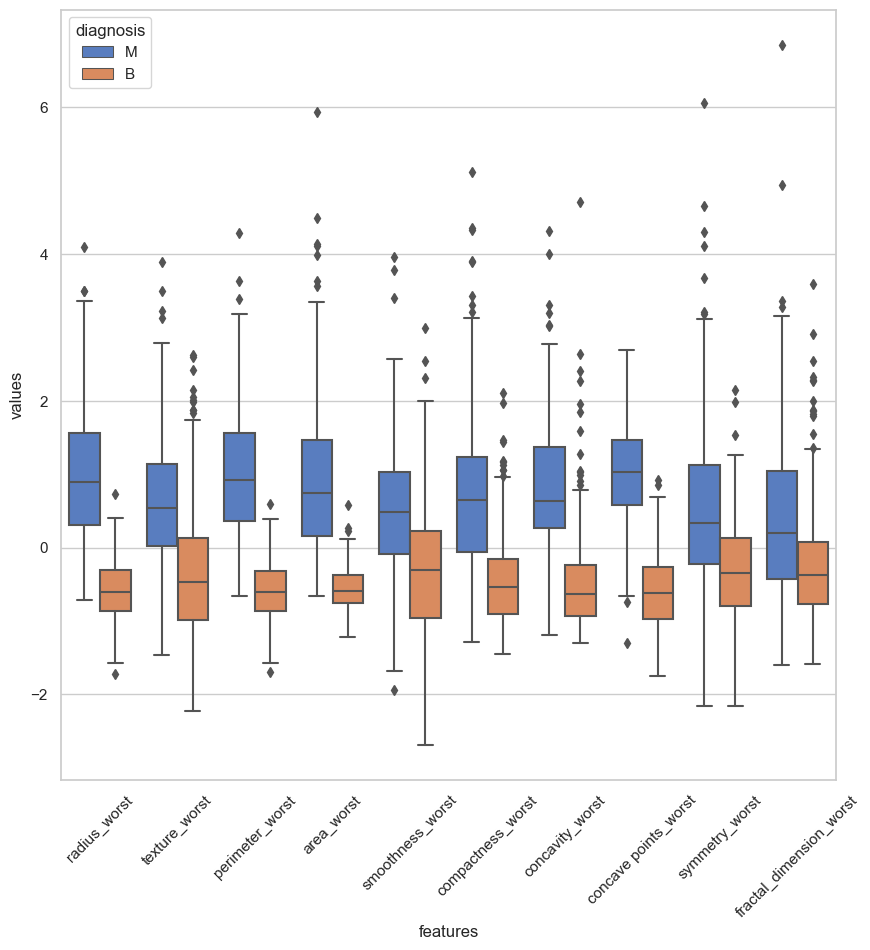

In [91]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='features', y='values', hue='diagnosis', data=get_data(20, 30))
plt.xticks(rotation=45)

plt.show()

## swarmplot

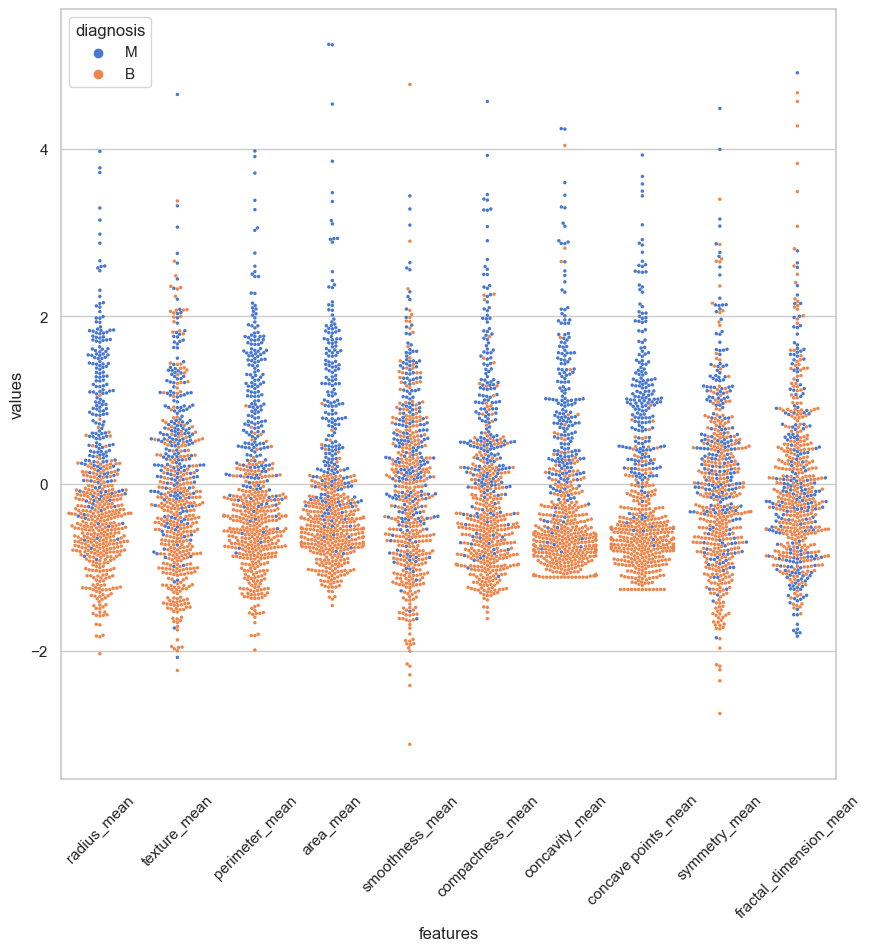

In [97]:
plt.figure(figsize=(10, 10))
sns.swarmplot(x='features', y='values', hue='diagnosis', data=get_data(0, 10), size=2.5)
plt.xticks(rotation=45)

plt.show()

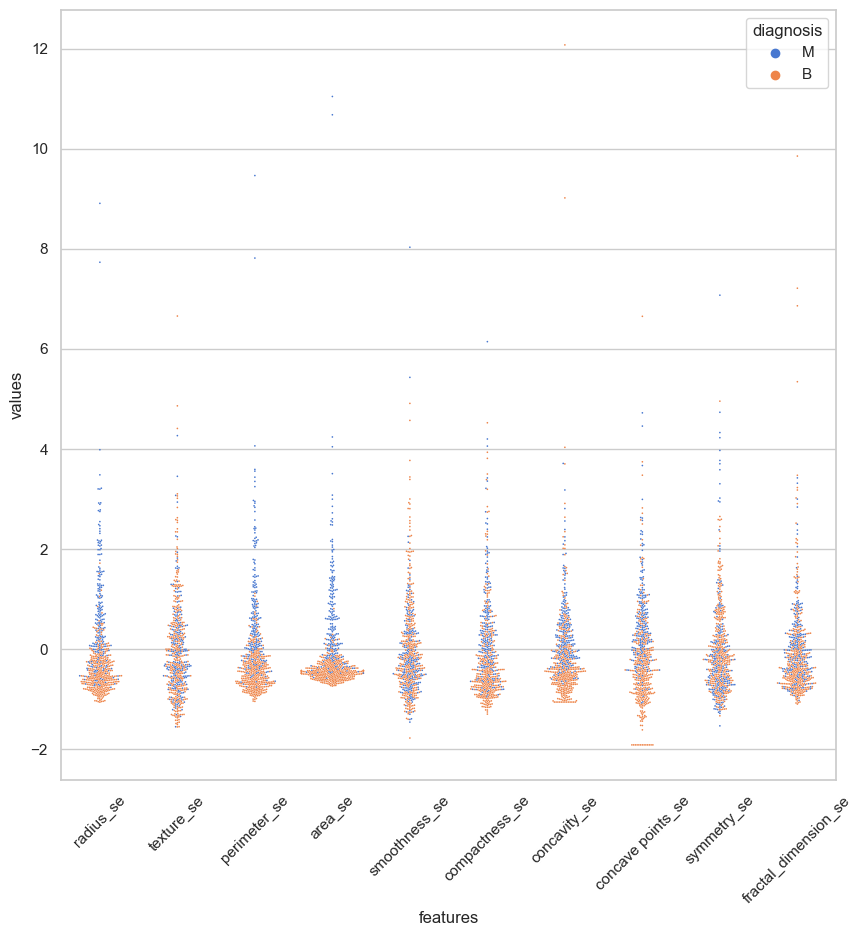

In [104]:
plt.figure(figsize=(10, 10))
sns.swarmplot(x='features', y='values', hue='diagnosis', data=get_data(10, 20), size=1.2)
plt.xticks(rotation=45)

plt.show()

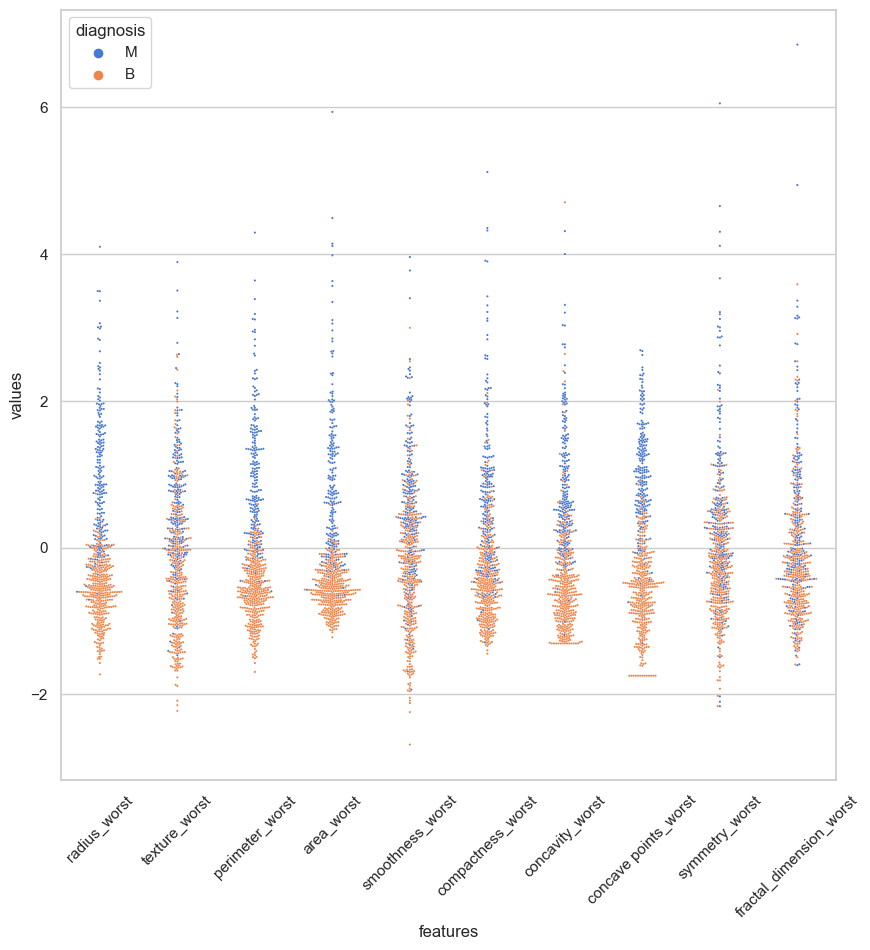

In [105]:
plt.figure(figsize=(10, 10))
sns.swarmplot(x='features', y='values', hue='diagnosis', data=get_data(20, 30), size=1.5)
plt.xticks(rotation=45)

plt.show()

# Joint Plot And Correlation Heatmap

## Joint plot

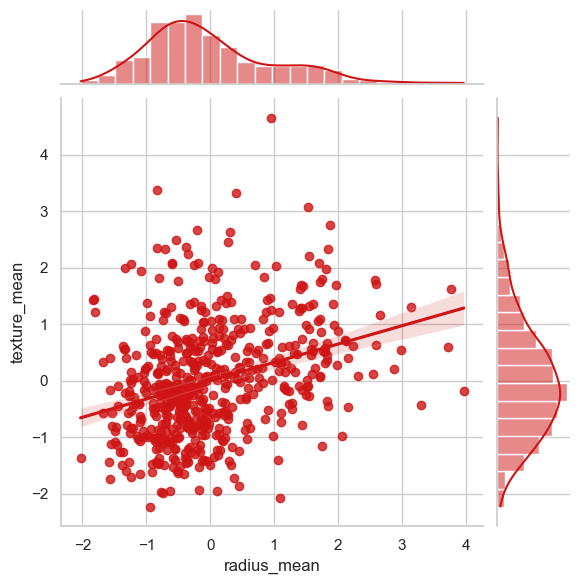

In [96]:
column_names = X.columns

sns.jointplot(x=X.loc[:, column_names[0]],
         y=X.loc[:, column_names[1]],
         kind='reg',
         color='#CE1414')
plt.show()

## correlation heatmap

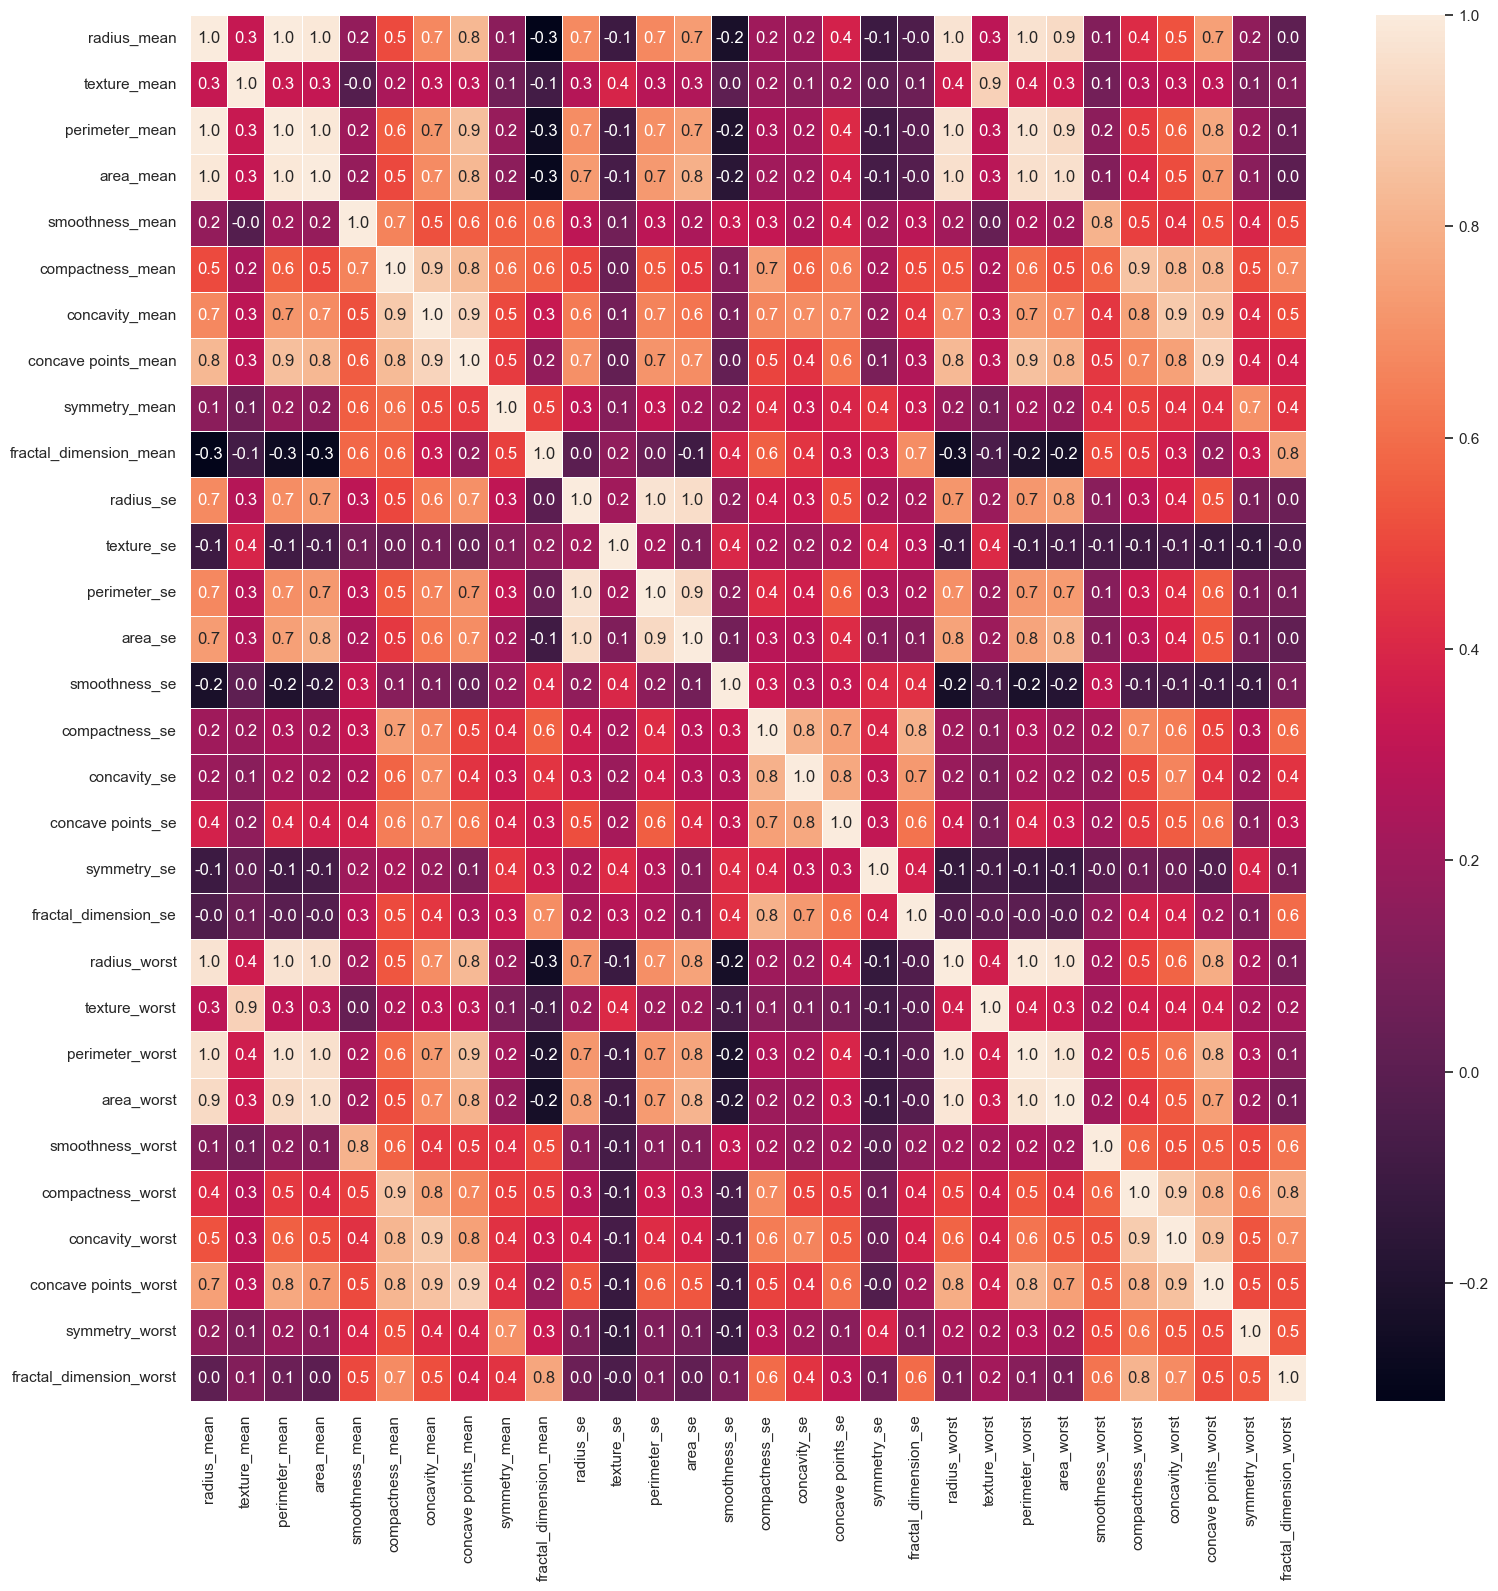

In [48]:
fig, ax = plt.subplots(figsize=(18, 18))

sns.heatmap(X.corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax)
plt.show()

# Dimensionality Reduction

## PCA

`PCA` or `principal component analysis` is a dimensionality reduction algorithms that tramsforms data to lower dimention, linearly. You can read about this algorithm [here](https://en.wikipedia.org/wiki/Principal_component_analysis)

In [107]:
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(X)

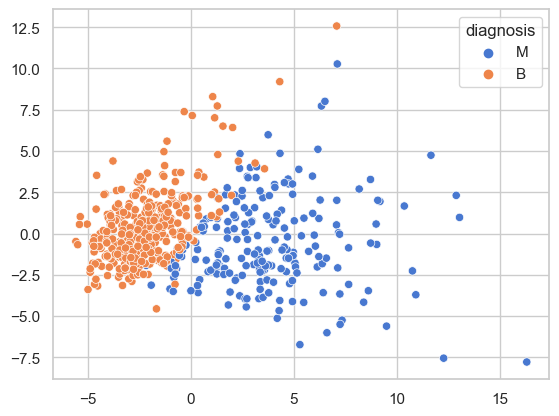

In [108]:
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1],hue=Y)
plt.show()

## T-SNE

`T-SNE` or `t-distributed stochastic neighbor embedding` is a dimensionality reduction algorithms that tramsforms data to lower dimention, non-plinearly. You can read about this algorithm [here](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)

In [109]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
               init='random', perplexity=3).fit_transform(X)

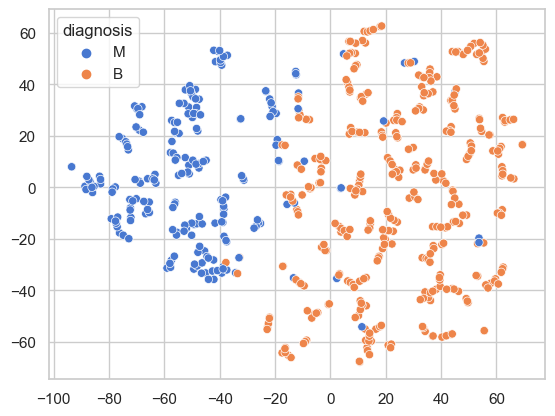

In [110]:
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=Y)
plt.show()